In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
import seaborn as sns

###Unemployment In India

In [165]:
df=pd.read_csv("Unemployment in India.csv")

In [166]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [167]:
df.shape

(768, 7)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [169]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [170]:
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Clean and pre-process the data

In [171]:
df = df.dropna()


In [172]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

###Check if this dataset contains missing values or not:

In [173]:
print(df.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


In [174]:
df[' Date'] = pd.to_datetime(df[' Date'])


In [175]:
df[' Date'] = pd.to_datetime(df[' Date'], format='%Y-%m-%d')

In [176]:
df[' Date']

0     2019-05-31
1     2019-06-30
2     2019-07-31
3     2019-08-31
4     2019-09-30
         ...    
749   2020-02-29
750   2020-03-31
751   2020-04-30
752   2020-05-31
753   2020-06-30
Name:  Date, Length: 740, dtype: datetime64[ns]

In [177]:
df['Year'] = df[' Date'].dt.year
df['Month'] = df[' Date'].dt.month


In [178]:
df[' Date'].dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
749    2020
750    2020
751    2020
752    2020
753    2020
Name:  Date, Length: 740, dtype: int64

# Bar chart to visualize the average unemployment rate by region

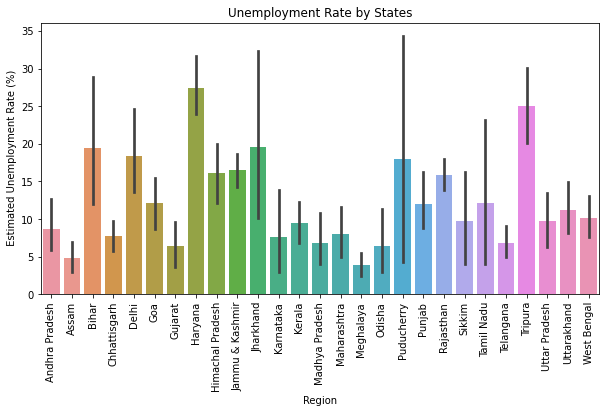

In [194]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df, ax=ax)
plt.xticks(rotation=90)
plt.title("Unemployment Rate by States")
plt.show()


# Pie chart to visualize the labor force participation rate

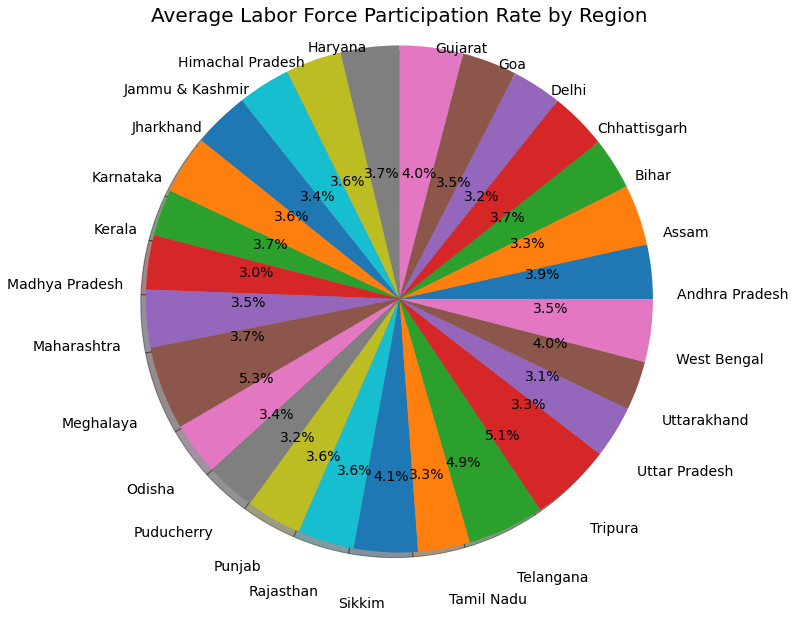

In [192]:
import matplotlib.pyplot as plt

labels = df['Region'].unique()
sizes = df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean().values

fig1, ax1 = plt.subplots(figsize=(10, 10))
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
for text in texts:
    text.set_size(14)
    text.set_y(text.get_position()[1]-0.1)
for autotext in autotexts:
    autotext.set_size(14)
    autotext.set_y(autotext.get_position()[1]-0.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Average Labor Force Participation Rate by Region', fontsize=20)
plt.show()



# Line plot to visualize the trend in unemployment rate over time

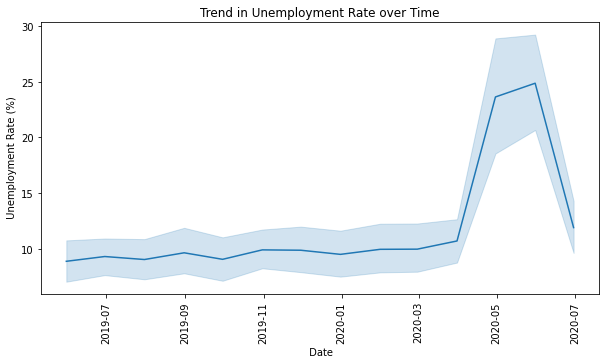

In [181]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df, ax=ax)
plt.title('Trend in Unemployment Rate over Time')
plt.xlabel(' Date')
plt.ylabel(' Unemployment Rate (%)')

# rotating the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

plt.show()


##Unemployment Rate upto 11-2020

In [182]:
df = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


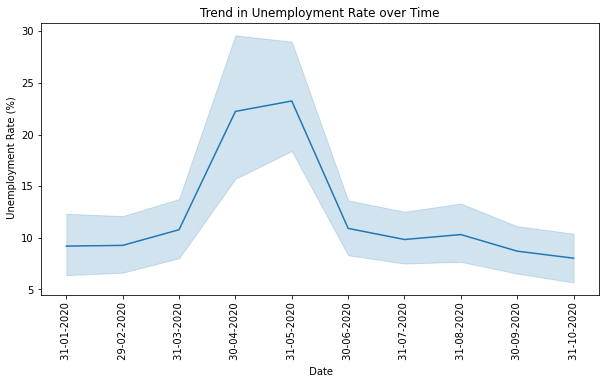

In [183]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', data=df, ax=ax)
plt.title('Trend in Unemployment Rate over Time')
plt.xlabel(' Date')
plt.ylabel(' Unemployment Rate (%)')

# rotating the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

plt.show()

In [184]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [185]:

X = df[[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'longitude', 'latitude']]

y = df[' Estimated Employed']
     

from sklearn.model_selection import train_test_split
     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
     

X_train

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
245,4.18,56106836,35.45,26.8467,80.9462
20,10.61,26397671,37.72,25.0961,85.3131
112,29.84,16718395,42.78,15.3173,75.7139
220,6.25,12172230,41.06,18.1124,79.0193
246,3.75,56539521,35.49,26.8467,80.9462
...,...,...,...,...,...
196,17.51,20014060,41.71,27.0238,74.2179
144,9.23,39708538,42.71,19.7515,75.7139
107,8.24,10185670,41.04,23.6102,85.2799
203,4.45,265175,48.32,27.5330,88.5122


In [186]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
#fit the model inside it
lm.fit(X_train, y_train)
     
LinearRegression()

#evaluating model
coeff_data = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
     

#This table is saying 
#if one unit is increase then area income will increase by $21
coeff_data

,Coefficient
Estimated Unemployment Rate (%),-1.810212e-10
Estimated Employed,1.000000e+00
Estimated Labour Participation Rate (%),3.567607e-11
longitude,-7.739579e-12
latitude,-5.853043e-11


##Predict the future unemployment

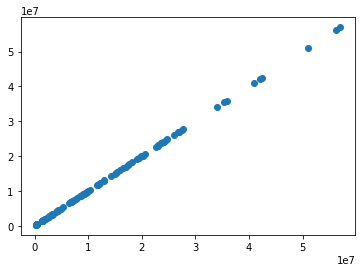

In [187]:
#Predict the model
predictions = lm.predict(X_test)
     

#plotting the prediction agains the target variable
plt.scatter(y_test, predictions)

In [188]:
import plotly.express as px
import matplotlib.pyplot as plt


In [189]:
df[' Date']

0       31-01-2020
1       29-02-2020
2       31-03-2020
3       30-04-2020
4       31-05-2020
          ...     
262     30-06-2020
263     31-07-2020
264     31-08-2020
265     30-09-2020
266     31-10-2020
Name:  Date, Length: 267, dtype: object

In [190]:
fg = px.bar(df, x='Region', y=' Estimated Unemployment Rate (%)', color='Region', animation_frame=' Date', template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'}, 
                  title=dict(text='Unemployment Rate Analysis', x=0.5, y=0.95, xanchor='center', yanchor='top'))
fg.show()


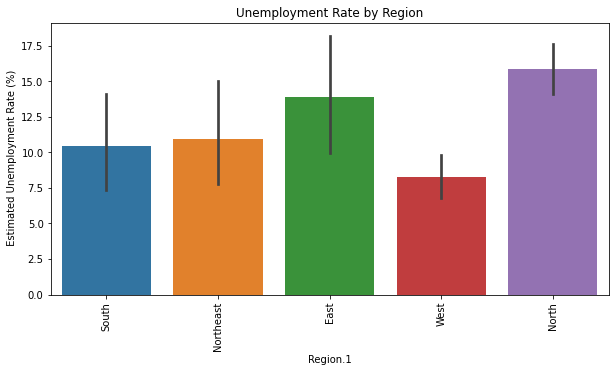

In [196]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Region.1', y=' Estimated Unemployment Rate (%)', data=df, ax=ax)
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.show()

# Finally We Can Understand:
####The analysis of the data science project on unemployment in India during the COVID-19 pandemic provides insights into the impact of the pandemic on employment in different regions of India.

####From the analysis, it can be seen that the unemployment rate in India increased during the COVID-19 pandemic. The highest unemployment rate was observed in the Northern region, followed by the Eastern, NorthEast, and Western regions. The participation rate of the labor force also decreased during the pandemic.

####The number of estimated employed people also decreased during the pandemic, but started to recover from the end of 2020. However, the recovery rate varied in different regions, with the Southern region having the slowest recovery rate.

####The line graph of estimated employed people over time by region shows that the Western region had the highest rate of employment recovery, followed by the Eastern and Northern regions. The Southern region had the slowest rate of employment recovery.

####Overall, the data provides a clear picture of the impact of the COVID-19 pandemic on employment in India. The analysis helps to understand the areas of the country that were most affected and the regions that had a faster recovery rate. This information can be used by the government and other organizations to take appropriate measures to address the unemployment situation in India.